findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

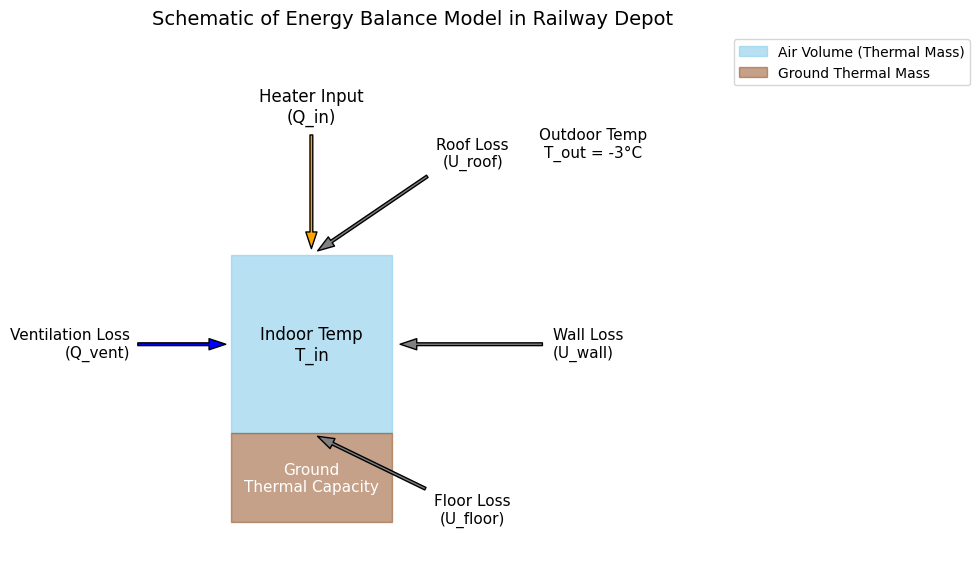

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create schematic plot
fig, ax = plt.subplots(figsize=(10, 6))

# Air volume block
air_box = plt.Rectangle((0.3, 0.3), 0.4, 0.4, color='skyblue', label='Air Volume (Thermal Mass)', alpha=0.6)
ax.add_patch(air_box)

# Ground thermal capacity block
ground_block = plt.Rectangle((0.3, 0.1), 0.4, 0.2, color='saddlebrown', label='Ground Thermal Mass', alpha=0.5)
ax.add_patch(ground_block)
ax.text(0.5, 0.2, 'Ground\nThermal Capacity', ha='center', va='center', fontsize=11, color='white')

# Heat input (radiant panel)
ax.annotate('Heater Input\n(Q_in)', xy=(0.5, 0.7), xytext=(0.5, 1.0),
            arrowprops=dict(facecolor='orange', shrink=0.05, width=2, headwidth=8),
            ha='center', fontsize=12)

# Heat loss through walls
ax.annotate('Wall Loss\n(U_wall)', xy=(0.7, 0.5), xytext=(1.1, 0.5),
            arrowprops=dict(facecolor='gray', shrink=0.05, width=2, headwidth=8),
            va='center', fontsize=11)

# Heat loss through roof
ax.annotate('Roof Loss\n(U_roof)', xy=(0.5, 0.7), xytext=(0.9, 0.9),
            arrowprops=dict(facecolor='gray', shrink=0.05, width=2, headwidth=8),
            ha='center', fontsize=11)

# Heat loss through floor
ax.annotate('Floor Loss\n(U_floor)', xy=(0.5, 0.3), xytext=(0.9, 0.1),
            arrowprops=dict(facecolor='gray', shrink=0.05, width=2, headwidth=8),
            ha='center', fontsize=11)

# Ventilation loss arrow
ax.annotate('Ventilation Loss\n(Q_vent)', xy=(0.3, 0.5), xytext=(0.05, 0.5),
            arrowprops=dict(facecolor='blue', shrink=0.05, width=2, headwidth=8),
            va='center', ha='right', fontsize=11)

# Indoor temperature label
ax.text(0.5, 0.5, 'Indoor Temp\nT_in', ha='center', va='center', fontsize=12, color='black')

# Outdoor temperature label
ax.text(1.2, 0.95, 'Outdoor Temp\nT_out = -3°C', ha='center', va='center', fontsize=11, color='black')

# Axis settings
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.2)
ax.axis('off')

# Title and legend
plt.title('Schematic of Energy Balance Model in Railway Depot', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)
plt.tight_layout()
plt.show()



### Ground Thermal Capacity
Determine value for `ground_thermal_capacity`

To calculate it from first principles: 

$$C_{ground} = m_{ground} \cdot c_{p, soil}$$

Where:
* $C_{ground}$ is the thermal capacity of the ground in $J/K$.
* $m_{ground}$ is the mass of the soil (in kg) that is thermally coupled with the building. This is the hardest value to determine, as it requires knowing the effective depth of heat penetration into the ground over the simulation time.
* $c_{p, soil}$ is the specific heat capacity of the soil (you correctly note a typical value is around $1000 \, J/(kg \cdot K)$).

For context, if we assume an effective depth of just $0.5 \, m$ of soil beneath the depot floor ($3800 \, m^2$) with a typical soil density of $1500 \, kg/m^3$:

* **Volume:** $3800 \, m^2 \times 0.5 \, m = 1900 \, m^3$
* **Mass:** $1900 \, m^3 \times 1500 \, kg/m^3 = 2.85 \times 10^6 \, kg$
* **Calculated Thermal Capacity:** $2.85 \times 10^6 \, kg \times 1000 \, J/(kg \cdot K) = 2.85 \times 10^9 \, J/K$


### The Mathematical Model
The code numerically solves a **first-order ordinary differential equation (ODE)** that describes the energy balance of the depot. The fundamental principle is the first law of thermodynamics: the change in the internal energy of the system is equal to the net heat added to the system.

The core equation for the indoor temperature ($T_{in}$) over time ($t$) is:

$$\frac{dT_{in}}{dt} = \frac{Q_{net}}{C_{total}}$$

#### 1. Total Thermal Capacity ($C_{total}$)

This represents the system's resistance to temperature change. In the model, it's the sum of the thermal capacity of the air and the ground.

$$C_{total} = C_{air} + C_{ground}$$

* **Air Thermal Capacity ($C_{air}$):** Calculated as the product of the air's volume ($V_{air}$), density ($\rho_{air}$), and specific heat capacity ($c_{p,air}$).
    $$C_{air} = V_{air} \cdot \rho_{air} \cdot c_{p,air}$$
* **Ground Thermal Capacity ($C_{ground}$):** The assumed value discussed above.

#### 2. Net Heat Flow Rate ($Q_{net}$)

This is the rate at which energy is added to the system (in Watts, or Joules per second). It's the difference between the heat generated by the panels and the heat lost to the environment.

$$Q_{net} = Q_{panels} - Q_{loss}$$

* **Heating Power ($Q_{panels}$):** The heat supplied by the panels.
    $$Q_{panels} = N_{panels} \cdot P_{panel}$$
* **Total Heat Loss ($Q_{loss}$):** The sum of heat loss from conduction (through the building envelope) and ventilation (air exchange).
    $$Q_{loss} = Q_{conduction} + Q_{ventilation}$$

#### 3. Heat Loss Mechanisms

Heat loss is driven by the temperature difference between the inside and outside, $\Delta T = T_{in} - T_{out}$.

* **Conduction Loss ($Q_{conduction}$):** Heat transfer through the building's surfaces (walls, windows, etc.). It is calculated by summing the heat flow through each component, governed by its area ($A$) and U-value ($U$).
    $$Q_{conduction} = (\sum_{i} U_i A_i) \cdot \Delta T$$
    The code sums the contributions from solid walls, windows, shutters, the roof, and the floor.
    $$\sum U_i A_i = (U_{solid}A_{solid} + U_{win}A_{win} + U_{shut}A_{shut} + U_{roof}A_{roof} + U_{floor}A_{floor})$$

* **Ventilation Loss ($Q_{ventilation}$):** Heat lost by replacing warm indoor air with cold outdoor air.
    $$Q_{ventilation} = \dot{m}_{air} \cdot c_{p,air} \cdot \Delta T$$
    Where the mass flow rate of air ($\dot{m}_{air}$) is determined by the Air Changes per Hour (ACH) and the building volume ($V_{air}$).
    $$\dot{m}_{air} = \frac{ACH \cdot V_{air}}{3600} \cdot \rho_{air}$$

#### 4. Numerical Solution

The code does not solve the differential equation analytically. Instead, it uses the **Euler method**, a numerical technique to approximate the solution over discrete time steps ($\Delta t$). The temperature at the next time step ($T_{t+1}$) is found from the temperature at the current time step ($T_t$):

$$T_{t+1} = T_t + \Delta T_{in}$$

Where the change in temperature is calculated as:

$$\Delta T_{in} = \frac{Q_{net} \cdot \Delta t}{C_{total}}$$

This is exactly what your `for` loop implements:
`temps[t] = temps[t-1] + (net_heat * time_step) / total_thermal_capacity`

This is a valid and common approach for this type of thermal simulation.

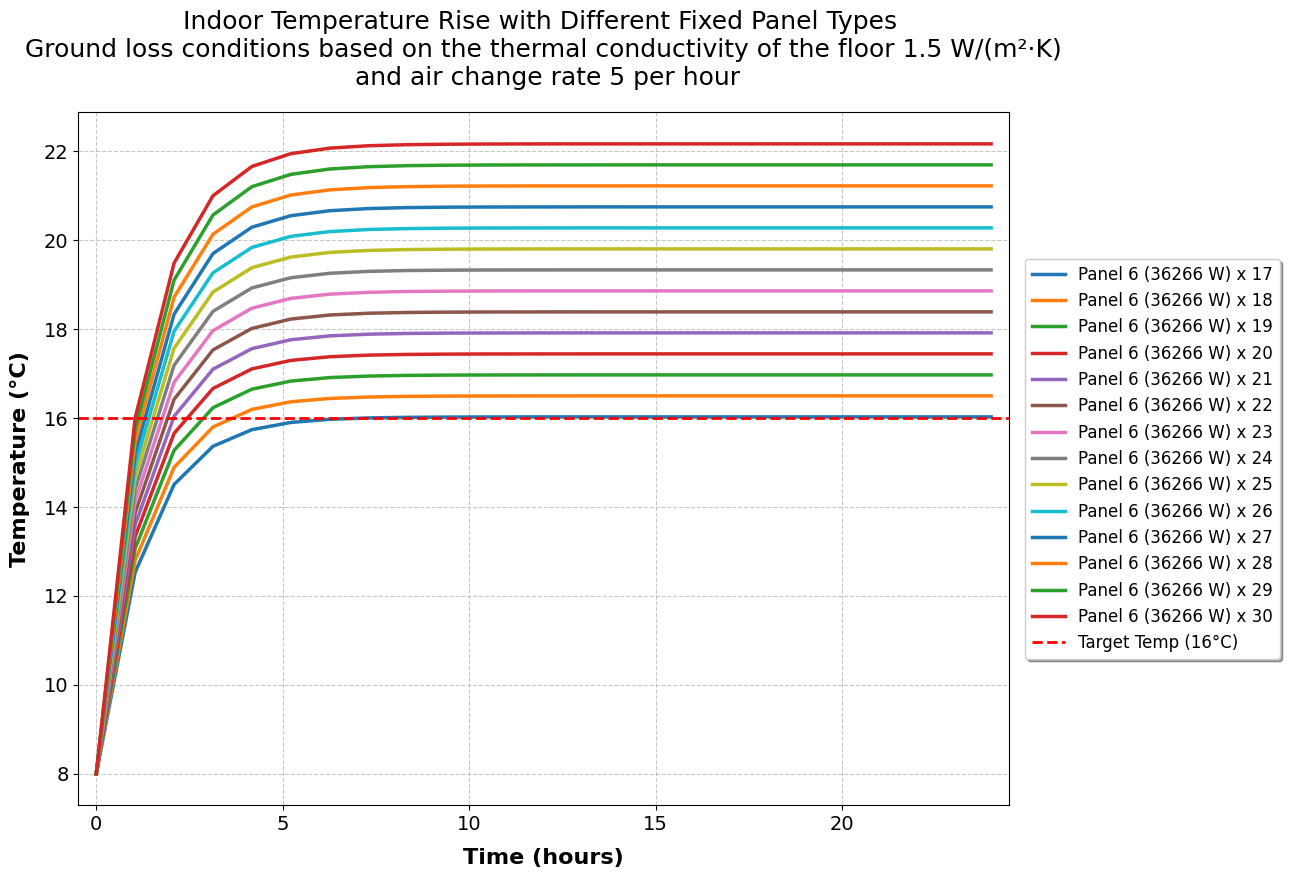


Heating Panel Summary:
- Panel 6 (36266 W): Panels needed = 17
- Panel 6 (36266 W): Panels needed = 18
- Panel 6 (36266 W): Panels needed = 19
- Panel 6 (36266 W): Panels needed = 20
- Panel 6 (36266 W): Panels needed = 21
- Panel 6 (36266 W): Panels needed = 22
- Panel 6 (36266 W): Panels needed = 23
- Panel 6 (36266 W): Panels needed = 24
- Panel 6 (36266 W): Panels needed = 25
- Panel 6 (36266 W): Panels needed = 26
- Panel 6 (36266 W): Panels needed = 27
- Panel 6 (36266 W): Panels needed = 28
- Panel 6 (36266 W): Panels needed = 29
- Panel 6 (36266 W): Panels needed = 30


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Depot dimensions

length = 100.0        # m
width = 38.0          # m
height = 0.5*(8.5+5.8)         # m

wall_area_total = 2 * height * (length + width)  # m²
# Wall breakdown
side_wall_area = height * length  # each long side
window_area = 0.5 * side_wall_area * 2  # 50% of both long sides
shutter_area = 22.5  # total 22.5 m²
solid_wall_area = wall_area_total - window_area - shutter_area

ground_insulation = False # True for insulated floor, False for uninsulated floor

# U-values
U_solid_wall = 1.6      # W/(m²·K) Cavity wall, no insulation
U_window = 5.0          # W/(m²·K) Single glazed
U_shutter = 4.5         # W/(m²·K)
U_roof = 5.0            # W/(m²·K) Perspex/Glass
if ground_insulation:
    U_floor = 0.2           # W/(m²·K)  # 0.2 W/(m²·K) for insulated floor
else:
    U_floor = 1.5           # W/(m²·K)  # 1.5 W/(m²·K) for uninsulated floor

roof_area = length * width                 # m²
floor_area = roof_area                     # m²

# Temperature setup
inside_temp_target = 16.0    # °C
initial_inside_temp = 8.0   # °C
outside_temp = 8.0          # °C

panel_single_energy = [36266]  # W
# panel references: 1,2,3,4,5,6,7,8
ref_panel_names = [
    "Panel 6 (36266 W)"
]

# Ground & air thermal properties
if ground_insulation:
    ground_thermal_capacity = 0
else:
    ground_thermal_capacity = floor_area * 120e3  # ~4.6×10^8 J/K

air_density = 1.225         # kg/m³
specific_heat_air = 1005    # J/(kg·K)

# Ventilation
enable_ventilation = True  # not decided yet !
air_change_rate_per_hour = 5 # ACH (5-8 or 8-12 ACH found in the literature)

# Simulation time
time_step = 3600 # seconds
total_simulation_time = 24 * 3600  # 24 hours
time_steps = int(total_simulation_time / time_step)
time = np.linspace(0, total_simulation_time, time_steps) / 3600  # in hours

# DERIVED PARAMETERS

volume_air = height * width * length  # m³
thermal_capacity_air = volume_air * air_density * specific_heat_air  # J/K
total_thermal_capacity = thermal_capacity_air + ground_thermal_capacity
if total_thermal_capacity <= 0:
    raise ValueError("Total thermal capacity is zero or negative.")


# FUNCTIONS
def calculate_heat_loss(delta_T):
    wall_loss = (
        solid_wall_area * U_solid_wall +
        window_area * U_window +
        shutter_area * U_shutter
    ) * delta_T
    roof_loss = roof_area * U_roof * delta_T
    floor_loss = floor_area * U_floor * delta_T
    return wall_loss + roof_loss + floor_loss

def calculate_ventilation_loss(delta_T):
    if not enable_ventilation:
        return 0.0
    air_flow_rate = (air_change_rate_per_hour * volume_air) / 3600  # m³/s
    return air_density * specific_heat_air * air_flow_rate * delta_T  # W

def simulate_heating(panel_power):
    temps = np.zeros(time_steps)
    temps[0] = initial_inside_temp

    for t in range(1, time_steps):
        delta_T = temps[t-1] - outside_temp
        heat_loss = calculate_heat_loss(delta_T) + calculate_ventilation_loss(delta_T)
        net_heat = panel_power - heat_loss
        temps[t] = temps[t-1] + (net_heat * time_step) / total_thermal_capacity
    return temps

# MAIN CALCULATION LOOP
panel_results = []
for panel_idx, panel_power in enumerate(panel_single_energy):
    min_panels = 10
    max_panels = 30
    found = False
    for num_panels in range(min_panels, max_panels + 1):
        total_power = panel_power * num_panels
        temperature_profile = simulate_heating(total_power)
        final_temp = temperature_profile[-1]
        if final_temp >= inside_temp_target:
            panel_results.append({
                'panel_type': ref_panel_names[panel_idx],  # Use correct panel name
                'num_panels': num_panels,
                'temperature_profile': temperature_profile
            })
            found = True
            #break
    if not found:
        panel_results.append({
            'panel_type': ref_panel_names[panel_idx],  # Use correct panel name
            'num_panels': 'Not sufficient (max limit reached)',
            'temperature_profile': None
        })

# RESULTS AND PLOTS

# Set better font parameters for presentations
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 12
})

plt.figure(figsize=(12, 9))  # 16:9 aspect ratio for presentations
for result in panel_results:
    if result['temperature_profile'] is not None:
        plt.plot(time, result['temperature_profile'], label=f"{result['panel_type']} x {result['num_panels']}", linewidth=2.5)
    else:
        print(f"{result['panel_type']}: Insufficient heating even with {max_panels} panels.")

plt.axhline(inside_temp_target, color='red', linestyle='--', label='Target Temp (16°C)', linewidth=2)
plt.xlabel('Time (hours)', fontweight='bold', labelpad=10)
plt.ylabel('Temperature (°C)', fontweight='bold', labelpad=10)
plt.title('Indoor Temperature Rise with Different Fixed Panel Types \n Ground loss conditions based on the thermal conductivity of the floor {} W/(m²·K) \n and air change rate {} per hour'.format(U_floor, air_change_rate_per_hour), pad=20)

# Improve grid appearance
plt.grid(True, linestyle='--', alpha=0.7)

# Improve legend right side of the plot
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5), fontsize=12, frameon=True, fancybox=True, shadow=True)

# Add margins for better spacing
plt.margins(x=0.02)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # More space at bottom for legend

plt.show()

# ========================
# TEXTUAL SUMMARY
# ========================

print("\nHeating Panel Summary:")
for result in panel_results:
    print(f"- {result['panel_type']}: Panels needed = {result['num_panels']}")


## Refrence

### Gound termal capacity
1. https://www.designingbuildings.co.uk/wiki/Kappa%20value%20-%20thermal%20mass%20value?utm_source
Published values from standards and guidelines
Kappa (thermal mass) values (SAP/SBEM)
Dense concrete floor/ceiling: 120–160 kJ/m²·K 
This metric represents heat capacity per square metre per Kelvin

### ACH for warehouse / industrial space
1. https://www.atlenv.com/building-ventilation-the-proper-air-changes-per-hour-ach?utm_source
6-30 ACH
2. https://energy-models.com/forum/warehouse-ventilations-comply-ashrae-621?utm_source
5-8 ACH



findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

Temperature after 24 hours with 12 panel(s): 25.48 °C


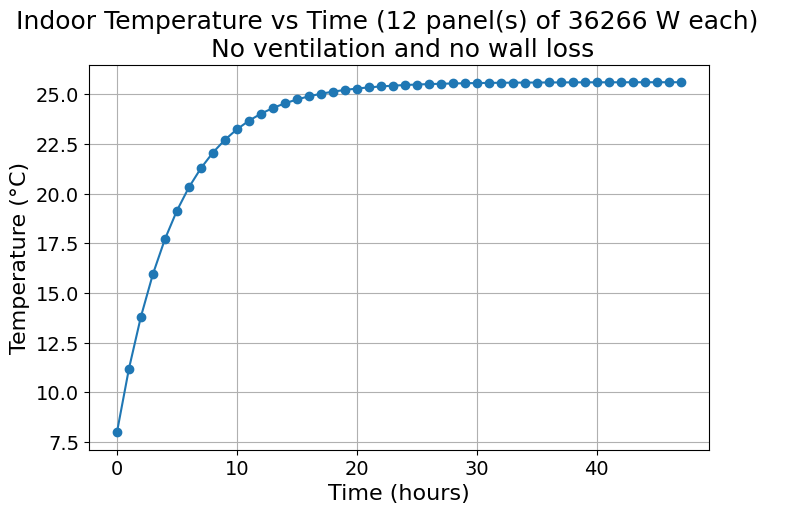

In [12]:
# Set the number of panels you want to test
numberOfPanel = 12  # Change this to any integer you want

# Use the same panel power as in your model
panel_power = 36266  # W

# Define the parameters for the simulation
enable_ventilation = False

# Reuse the simulate_heating function from your model
def calculate_heat_loss(delta_T):
    wall_loss = 0
    #wall_loss = (
        #solid_wall_area * U_solid_wall +
        #window_area * U_window +
        #shutter_area * U_shutter
    #) * delta_T
    roof_loss = roof_area * U_roof * delta_T
    floor_loss = floor_area * U_floor * delta_T
    return wall_loss + roof_loss + floor_loss

def calculate_ventilation_loss(delta_T):
    if not enable_ventilation:
        return 0.0
    air_flow_rate = (air_change_rate_per_hour * length * width * height) / 3600  # m³/s
    return air_density * specific_heat_air * air_flow_rate * delta_T  # W

def simulate_heating(panel_power):
    time_step = 3600 # seconds
    total_simulation_time = 48 * 3600  # 48 hours
    time_steps = int(total_simulation_time / time_step)
    temps = np.zeros(time_steps)
    temps[0] = initial_inside_temp
    for t in range(1, time_steps):
        delta_T = temps[t-1] - outside_temp
        heat_loss = calculate_heat_loss(delta_T) + calculate_ventilation_loss(delta_T)
        net_heat = panel_power - heat_loss
        temps[t] = temps[t-1] + (net_heat * time_step) / (volume_air * air_density * specific_heat_air + ground_thermal_capacity)
    return temps

# Run the simulation
total_power = panel_power * numberOfPanel
temps = simulate_heating(total_power)

# Get the temperature at 24hours (index 24, since each step is 1 hour)
temp_24h = temps[24]
print(f"Temperature after 24 hours with {numberOfPanel} panel(s): {temp_24h:.2f} °C")

# Plot temperature vs time
time_hours = np.arange(len(temps))
plt.figure(figsize=(8,5))
plt.plot(time_hours, temps, marker='o')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title(f'Indoor Temperature vs Time ({numberOfPanel} panel(s) of {panel_power} W each)   \n No ventilation and no wall loss')  # add 2nd sentence of saying no ventilation and no wall loss
plt.grid(True)
plt.show()